In [2]:
#impot
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [3]:
#data
ticker = "TSLA"
data = yf.download(ticker, start="2015-01-01")
data = data.reset_index()
data = data.dropna()

C:\Users\User\AppData\Local\Temp\ipykernel_6604\3303271489.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01")
[*********************100%***********************]  1 of 1 completed


In [4]:
#show data head
print(data.head())

Price        Date      Close       High        Low       Open    Volume
Ticker                  TSLA       TSLA       TSLA       TSLA      TSLA
0      2015-01-02  14.620667  14.883333  14.217333  14.858000  71466000
1      2015-01-05  14.006000  14.433333  13.810667  14.303333  80527500
2      2015-01-06  14.085333  14.280000  13.614000  14.004000  93928500
3      2015-01-07  14.063333  14.318667  13.985333  14.223333  44526000
4      2015-01-08  14.041333  14.253333  14.000667  14.187333  51637500


In [5]:
#time
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['dayofweek'] = data['Date'].dt.dayofweek
data['day'] = data['Date'].dt.day


In [6]:
#denoising
data['Close_denoised'] = data['Close'].rolling(window=10, center=True, min_periods=1).mean()


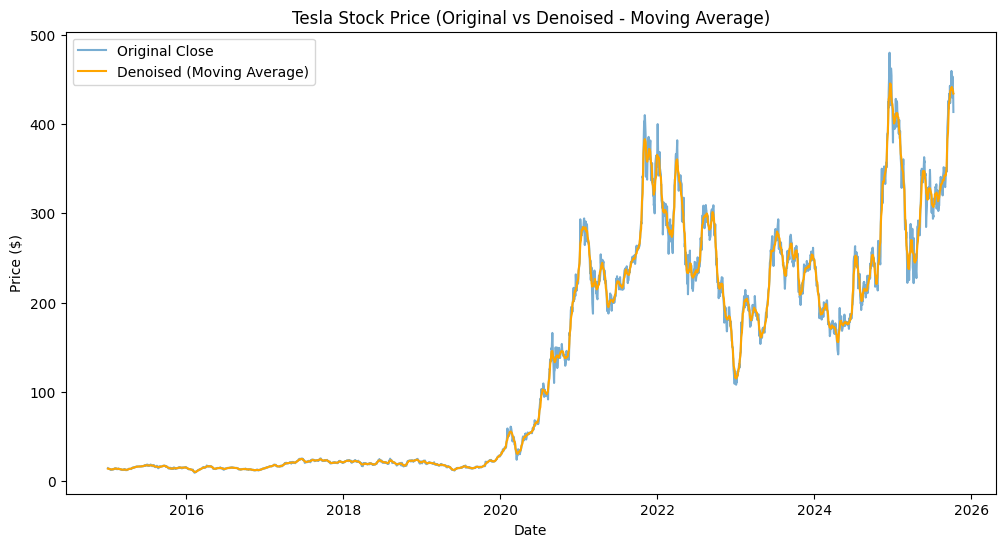

In [7]:
#show real and denoised data
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Original Close', alpha=0.6)
plt.plot(data['Date'], data['Close_denoised'], label='Denoised (Moving Average)', color='orange')
plt.title("Tesla Stock Price (Original vs Denoised - Moving Average)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [8]:
for lag in range(1, 8):
    data[f'lag_{lag}'] = data['Close_denoised'].shift(lag)

In [9]:
for i in range(1, 8):
    data[f'target_t+{i}'] = data['Close_denoised'].shift(-i)


In [10]:
data = data.dropna().reset_index(drop=True)

In [11]:
data.columns = [str(col) for col in data.columns]

In [12]:
features = [col for col in data.columns if col.startswith('lag_') or col in ['Open','High','Low','Volume','year','month','dayofweek','day']]
targets = [f'target_t+{i}' for i in range(1, 8)]


In [13]:
X = data[features]
y = data[targets]

KeyError: "None of [Index(['target_t+1', 'target_t+2', 'target_t+3', 'target_t+4', 'target_t+5',\n       'target_t+6', 'target_t+7'],\n      dtype='object')] are in the [columns]"